In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [2]:
sns.set(font_scale=2.8)

In [3]:
sig_sum = pd.read_csv('../new_man_tables/Fig4_mmp1_cxcl5_fib_signaling.csv', index_col=0) #mean over ligand and then target
sig_sum.head()

,source,target,ligand.complex,mean_TB_edge,mean_CTR_edge,count_FC
1,"Fibroblast|MMP1,CXCL5",Alveolar_Macrophages,COL6A5,0.057098,0,1
2,"Fibroblast|MMP1,CXCL5",AT1,COL6A5,0.150973,0,3
3,"Fibroblast|MMP1,CXCL5",AT2,COL6A5,0.120904,0,1
4,"Fibroblast|MMP1,CXCL5",CD16_Monocytes,COL6A5,0.045228,0,1
5,"Fibroblast|MMP1,CXCL5",Club cells,COL6A5,0.160866,0,1


select the top 5 ligand over all targets

In [4]:
ligands2plot=sig_sum.groupby('ligand.complex').mean().sort_values('mean_TB_edge',ascending=False)[:5].index
ligands2plot

/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_1263/2130299912.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ligands2plot=sig_sum.groupby('ligand.complex').mean().sort_values('mean_TB_edge',ascending=False)[:5].index


Index(['CXCL13', 'NTN1', 'GREM1', 'DSG2', 'CXCL6'], dtype='object', name='ligand.complex')

In [5]:
sig_nosum = pd.read_csv('../new_man_tables/Fig4_mmp1_cxcl5_fib_signaling_unsummarized.csv', index_col=0)
sig_nosum.head()

,source,target,ligand.complex,receptor.complex,edge_weight_TB,edge_weight_CTR,edge_FC
1,"Fibroblast|MMP1,CXCL5",Alveolar_Macrophages,COL6A5,ITGAV_ITGB8,0.057098,0,4.22336
2,"Fibroblast|MMP1,CXCL5",Alveolar_Macrophages,MMP13,LRP1,0.072512,0,4.22336
3,"Fibroblast|MMP1,CXCL5",AT1,COL6A5,ITGA2_ITGB1,0.059795,0,4.22336
4,"Fibroblast|MMP1,CXCL5",AT1,COL6A5,ITGA3_ITGB1,0.068948,0,4.22336
5,"Fibroblast|MMP1,CXCL5",AT1,COL6A5,SDC1,0.324177,0,4.22336


In [6]:
tmp=sig_nosum[['target', 'ligand.complex', 'receptor.complex', 'edge_weight_TB']]
tmp['barcode']=tmp.index
table = pd.pivot_table(tmp,index='barcode', values='edge_weight_TB', 
                       columns=['ligand.complex'])

/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_1263/2301529868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['barcode']=tmp.index


In [8]:
import anndata as ad
adata=ad.AnnData(table.fillna(0))

/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [10]:
adata.obs=tmp[['barcode', 'target', 'receptor.complex']].set_index('barcode')

/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/anndata/_core/anndata.py:767: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [13]:
import scanpy as sc

In [23]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


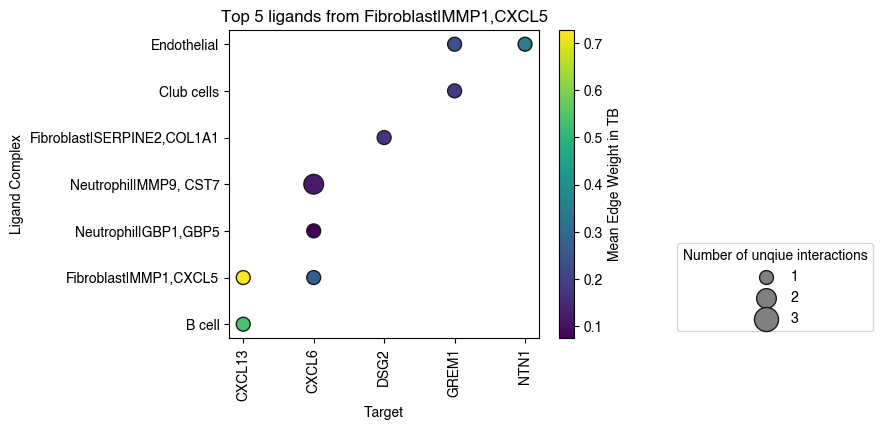

In [24]:
# plt.style.use('default')  # Use the default style
plt.rcParams.update({
    'axes.facecolor': 'white',  # Set the background color to white
    'axes.grid': False,         # Turn off the grid
})

plt.rc('font', family='Helvetica')

df=sig_sum.loc[sig_sum['ligand.complex'].isin(ligands2plot)]
# Define the colors based on 'edge_weight_TB' column
colors = df['mean_TB_edge']

# Define the sizes based on 'p_val' column (you can adjust the size scaling factor as needed)
sizes = df['count_FC'] * 100

# Create a scatter plot
plt.figure(figsize=(5, 4))
plt.scatter( df['ligand.complex'],df['target'], c=colors, s=sizes, cmap='viridis', edgecolor='k')
plt.colorbar(label='Mean Edge Weight in TB')
# Create a legend for sizes
legend_labels = [1, 2,3]  # Adjust these labels as needed
legend_handles = [plt.scatter([], [], s=size * 100,c='gray', edgecolor='k', label=str(size)) for size in legend_labels]
plt.legend(handles=legend_handles, title='Number of unqiue interactions',bbox_to_anchor=(2.1, 0), loc='lower right')

plt.xlabel('Target')
plt.ylabel('Ligand Complex')
plt.title('Top 5 ligands from Fibroblast|MMP1,CXCL5')
plt.xticks(rotation=90)
plt.savefig('../new_man_figs/Fig4/top5_ligand_mmp1_cxcl5_TB_edge_weight.pdf', bbox_inches='tight')
# Show the plot
plt.show()